## Polynomial Regression
Extra Reading: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

In [13]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

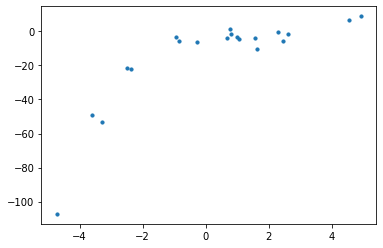

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# input and output is randomly generated here.
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

### Let’s apply a linear regression model to this dataset.


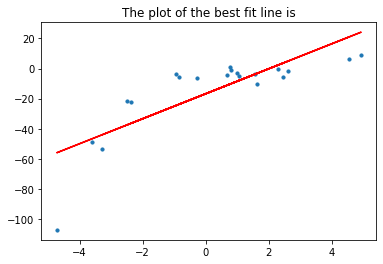

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.title("The plot of the best fit line is")
plt.show()

**Observation**: We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:

In [16]:
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse


15.908242501429996

In [18]:
r2 = r2_score(y,y_pred)
r2


0.6386750054827147

#### To overcome under-fitting, we need to increase the complexity of the model.


To generate a higher order equation we can add powers of the original features as new features. The linear model,
 y  = a + bx

can be transformed to y = a + bx + cx^2

NOTE: This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

## 2nd Approach with degree=2

- To convert the original features into their higher order terms we will use the **PolynomialFeatures** class provided by scikit-learn.
- Next, we train the model using **Linear Regression.**

In [19]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
x

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [20]:
y

array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

In [21]:

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
x

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

In [22]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

Root Mean Square Error 10.120437473614711
R-squared: 0.8537647164420812


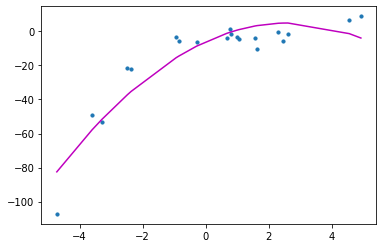

In [24]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error", rmse)
print("R-squared:", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

**Inference/observation:**
It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line.
Computing the RMSE and R²-score of the quadratic plot gives:<br>
RMSE: 10.1204 <br>
R²-score: 0.85

We can see that RMSE has decreased and R²-score has increased as compared to the linear line.

Extra Reading: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

**Defintion of R-squared:**<br>
R-squared is a goodness-of-fit measure for linear regression models <br><br>
This statistic indicates the percentage of the variance in the dependent variable(output) that the independent variables(inputs) explain collectively. <br><br>
R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.